In [396]:
import numpy as np, pandas as pd, statsmodels as sm, seaborn as sms, matplotlib.pyplot as plt
from pandas import Series, DataFrame

import sys
from contextlib import redirect_stdout, redirect_stderr

In [397]:
sales_data_df = pd.read_csv("../data/sales_data_sample.csv", sep=",", encoding='Latin-1')

sales_data_df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [398]:
sales_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [399]:
basic_statistics = sales_data_df.describe()

basic_statistics

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [400]:
# Highest sales amount

all_order_quant = sales_data_df['QUANTITYORDERED']

max_quantity_index = np.argmax(all_order_quant.values)

max_quantity = all_order_quant[max_quantity_index]

max_quantity_date = sales_data_df.loc[max_quantity_index]['ORDERDATE']

max_quantity_fname, max_quantity_lname = sales_data_df.loc[max_quantity_index, ['CONTACTFIRSTNAME', 'CONTACTLASTNAME']].values

print(f"Highest order quantity: {max_quantity}, occurs on {max_quantity_date} by {max_quantity_fname} {max_quantity_lname}")

Highest order quantity: 97, occurs on 4/14/2005 0:00 by Frederique Citeaux


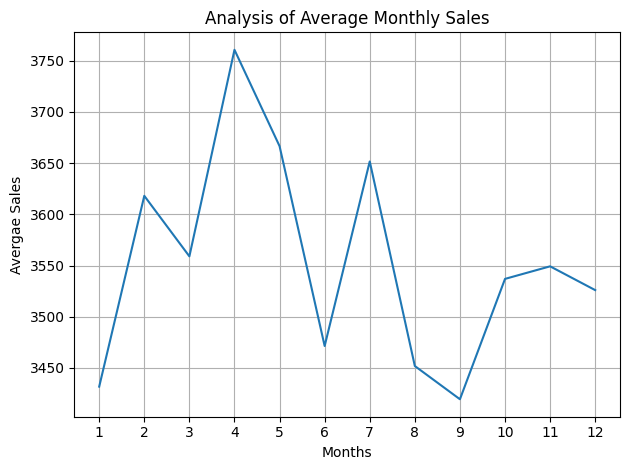

Two significant spikes occured in the average sales per month. 

These included:
- April: Sales reached an all-time high of 3760.62
- July: Sales reached a secondary peak of 3651.6

It's also important to note that a sharp decline is followed after both spikes.
- The sales declined from 3760.62 in April to 3471.43 in June, which is a difference of 289.2 sales
or a percentage difference of 7.69%
- The sales declined from 3651.6 in July to 3419.44 in September, which is a difference of 232.16 sales
or a percentage difference of 6.36%

The spikes can be explained by... 


In [401]:
# Sales trend to analyse average monthly sales

all_sales = sales_data_df[['SALES', 'MONTH_ID']].sort_values('MONTH_ID')

avg_monthly_sales = all_sales.groupby('MONTH_ID')['SALES'].mean()

months, sales = avg_monthly_sales.index, avg_monthly_sales.values

def percentage_difference(month1, month2):
        return np.round(np.abs(month1-month2)/month1 * 100, 2)

def numerical_difference(month1, month2):
    return np.round(np.abs(month1-month2), 2)

plt.plot(months, sales)
plt.xlabel('Months')
plt.ylabel('Avergae Sales')
plt.title('Analysis of Average Monthly Sales')
plt.grid(True)
plt.xticks(np.arange(min(months), max(months)+1, 1.0))
plt.tight_layout()
plt.show()

print(f"""Two significant spikes occured in the average sales per month. 

These included:
- April: Sales reached an all-time high of {np.round(sales[3], 2)}
- July: Sales reached a secondary peak of {np.round(sales[6], 2)}\n""")

print(f"""It's also important to note that a sharp decline is followed after both spikes.
- The sales declined from {np.round(sales[3], 2)} in April to {np.round(sales[5], 2)} in June, which is a difference of {numerical_difference(sales[3], sales[5])} sales
or a percentage difference of {percentage_difference(sales[3], sales[5])}%
- The sales declined from {np.round(sales[6], 2)} in July to {np.round(sales[8], 2)} in September, which is a difference of {numerical_difference(sales[6], sales[8])} sales
or a percentage difference of {percentage_difference(sales[6], sales[8])}%\n""")

print("The spikes can be explained by... ")



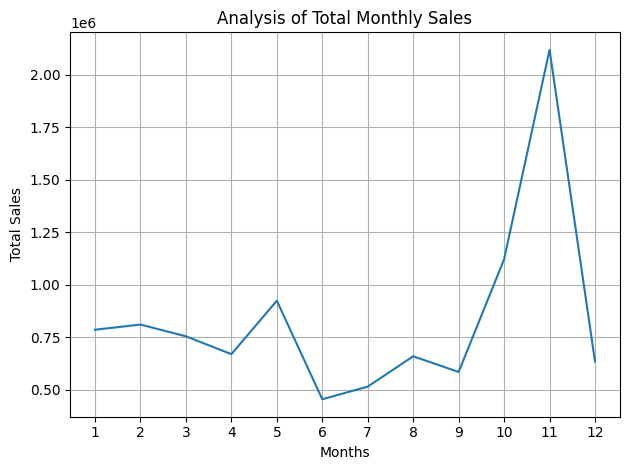

One significant spike occurred in the total sales per month. 

- November: Sales reached an all-time high of 2118885.67

The spike in total sales from September to November can be explained by the holiday shopping effect. 
This is a period where consumerism is at its peak with heavy advertising and marketing due to holidays.

It's also important to note that a sharp decline is followed after the spike heading into December.
- The sales declined from 2118885.67 in November to 634679.12 in December, which is a difference of 1484206.55 sales
or a percentage difference of 70.05%

The sudden decline in total sales after November would also contribute and further emphasise the likilihood of the holiday shopping effect.
As this is when the holidays begin to take place and therefore shopping will dramatically decrease.


In [402]:
# Sales trend to analyse total monthly sales

all_sales = sales_data_df[['SALES', 'MONTH_ID']].sort_values('MONTH_ID')

total_monthly_sales = all_sales.groupby('MONTH_ID')['SALES'].sum()

months, sales = total_monthly_sales.index, total_monthly_sales.values

plt.plot(months, sales)
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.title('Analysis of Total Monthly Sales')
plt.grid(True)
plt.xticks(np.arange(min(months), max(months)+1, 1.0))
plt.tight_layout()
plt.show()

print(f"""One significant spike occurred in the total sales per month. 

- November: Sales reached an all-time high of {np.round(sales[10], 2)}\n""")

print("""The spike in total sales from September to November can be explained by the holiday shopping effect. 
This is a period where consumerism is at its peak with heavy advertising and marketing due to holidays.\n""")

print(f"""It's also important to note that a sharp decline is followed after the spike heading into December.
- The sales declined from {np.round(sales[10], 2)} in November to {np.round(sales[11], 2)} in December, which is a difference of {numerical_difference(sales[10], sales[11])} sales
or a percentage difference of {percentage_difference(sales[10], sales[11])}%\n""")

print("""The sudden decline in total sales after November would also contribute and further emphasise the likilihood of the holiday shopping effect.
As this is when the holidays begin to take place and therefore shopping will dramatically decrease.""")

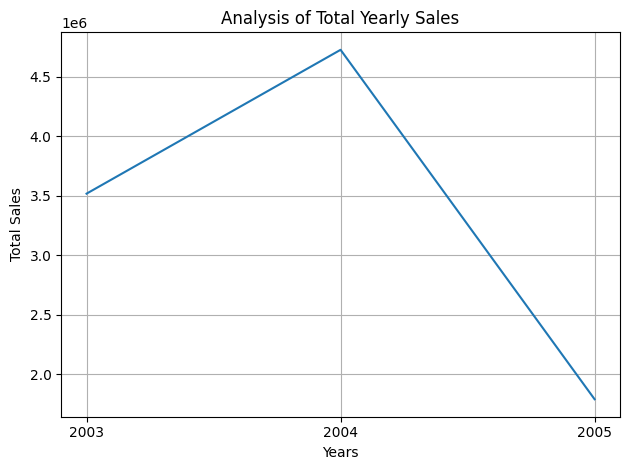

Between 2003 and 2004, the total sales increased from 3516979.54 to 4724162.6 which is a difference of 1207183.06 sales
or a percentage difference of 34.32%

Between 2004 and 2005, the total sales drastically decreased from 4724162.6 to 1791486.71 which is a difference of 2932675.89 sales
or a percentage difference of 62.08%



In [403]:
# Sales trend to analyse total yearly sales

all_sales = sales_data_df[['SALES', 'YEAR_ID']].sort_values('YEAR_ID')

total_yearly_sales = all_sales.groupby('YEAR_ID')['SALES'].sum()

years, sales = total_yearly_sales.index, total_yearly_sales.values

plt.plot(years, sales)
plt.xlabel('Years')
plt.ylabel('Total Sales')
plt.title('Analysis of Total Yearly Sales')
plt.grid(True)
plt.xticks(np.arange(min(years), max(years)+1, 1.0))
plt.tight_layout()
plt.show()

print(f"""Between 2003 and 2004, the total sales increased from {np.round(sales[0], 2)} to {np.round(sales[1], 2)} which is a difference of {numerical_difference(sales[0], sales[1])} sales
or a percentage difference of {percentage_difference(sales[0], sales[1])}%\n""")

print(f"""Between 2004 and 2005, the total sales drastically decreased from {np.round(sales[1], 2)} to {np.round(sales[2], 2)} which is a difference of {numerical_difference(sales[1], sales[2])} sales
or a percentage difference of {percentage_difference(sales[1], sales[2])}%\n""")

In [404]:
# Analysis on the sales per country (most, min, range, mean, median)

sales_per_country = sales_data_df.groupby('COUNTRY')['SALES'].sum().sort_values()

sales_per_city = sales_data_df.groupby('CITY')['SALES'].sum().sort_values()

most_city, most_city_sales = sales_per_city.index[-1], sales_per_city.values[-1]

least_city, least_city_sales = sales_per_city.index[0], sales_per_city.values[0]

most_country, most_country_sales = sales_per_country.index[-1], sales_per_country.values[-1]

least_country, least_country_sales = sales_per_country.index[0], sales_per_country.values[0]

print(f"""The country with the most sales is {most_country} which has {most_country_sales} sales.
The country with the least sales is {least_country} which has {least_country_sales} sales.
The city with the most sales is {most_city} which has {most_city_sales} sales.
The city with the least sales is {least_city} which has {least_city_sales} sales.\n
Range of sales is {most_country_sales-least_country_sales}.
Mean sales is {np.round(sales_per_country.values.mean(), 2)}.
Median sales is {np.round(np.median(sales_per_country.values), 2)}""")


The country with the most sales is USA which has 3627982.83 sales.
The country with the least sales is Ireland which has 57756.43 sales.
The city with the most sales is Madrid which has 1082551.44 sales.
The city with the least sales is Charleroi which has 33440.1 sales.

Range of sales is 3570226.4.
Mean sales is 528033.1.
Median sales is 245637.15


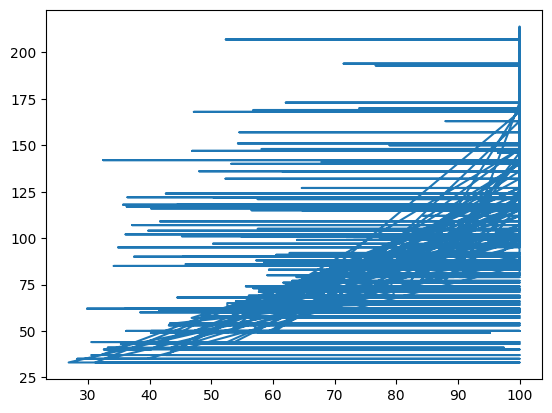

The mean difference between the price of an item and its MSRP is: 23.2967941905774


In [429]:
# Analysis on the standard deviation of the MSRP (Manufacturer's Suggested Retail Price) and the actual price.

all_items = sales_data_df[['PRICEEACH', 'MSRP']]

all_items_diff = np.abs(all_items['PRICEEACH'].values - all_items['MSRP'].values)

mean_price_diff = np.mean(all_items_diff)

print(f"""The mean difference between the price of an item and its MSRP is: {mean_price_diff}""")
